Implement a simple deep neural network (DNN) for solving the polynomial y = 5x^3 − 8x^2 − 7x + 1 with the following specifications:<br>
a) Use three hidden-layers of sizes 32, 64, and 128 and display the generated DNN with the required number of parameters.<br>
b) Generate training samples within the range of -20 to +20. Use the appropriate method for normalizing the training data in the range of -1 to +1.<br>
c) Use 5% of the samples as test data and 5% of the samples as validation data and the rest of the data for training the DNN with and appropriate number of epochs.<br>
d) Display the training accuracy vs validation accuracy and training error vs validation error curves.<br>
e) After training, use the test data for prediction and display the prediction accuracy vs true levels of the test data.<br>

Importing the required libraries and modules

In [269]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense

Creating the dataset

In [270]:
x = np.random.randint(-20, 20, 10000)
y = 5 * x ** 3 - 8 * x ** 2 - 7 * x + 1

Normalizing the dataset in the range of -1 to +1

In [271]:
x_normalized = (2 * (x - np.min(x)) / (np.max(x) - np.min(x))) -1 
y_normalized = (2 * (y - np.min(y)) / (np.max(y) - np.min(y))) -1

Splitting the dataset into training, validation, and test datasets

In [272]:
size = len(x_normalized)
x_train = x_normalized[:int(size * 0.9)]
y_train = y_normalized[:int(size * 0.9)]
x_test = x_normalized[int(size * 0.95):]
y_test = y_normalized[int(size * 0.95):]
x_validation = x_normalized[int(size * 0.9):int(size * 0.95)]
y_validation = y_normalized[int(size * 0.9):int(size * 0.95)]

Plotting the dataset

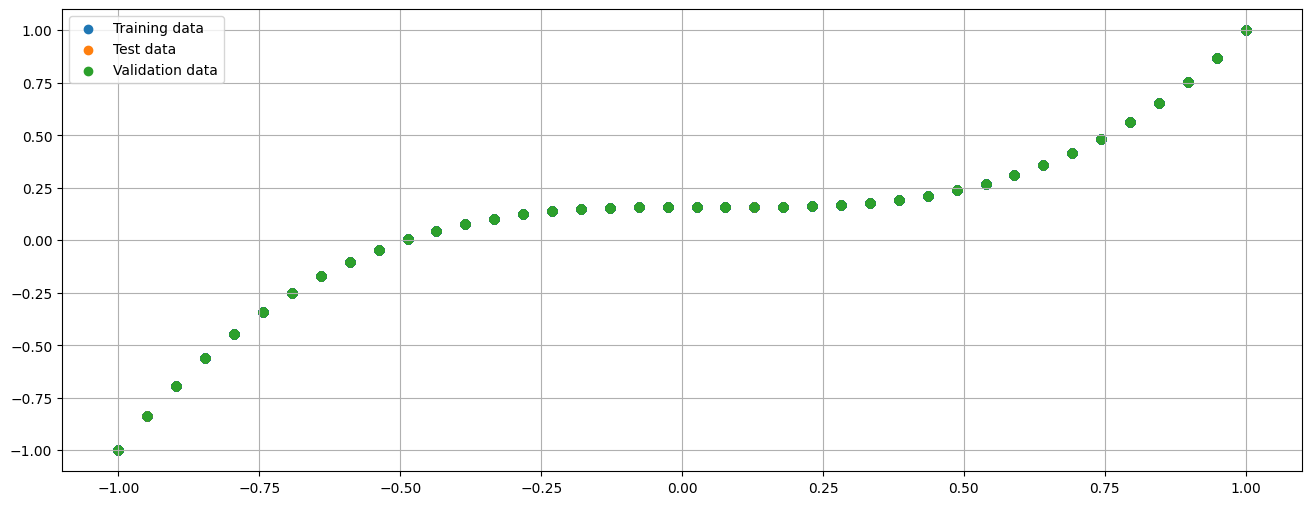

In [273]:
plt.figure(figsize=(16, 6))
plt.scatter(x_train, y_train, label='Training data')
plt.scatter(x_test, y_test, label='Test data')
plt.scatter(x_validation, y_validation, label='Validation data')
plt. legend()
plt.grid()
plt.show()

Building the DNN model

In [274]:
inputs = Input((1,))
hidden = Dense(32, activation='sigmoid')(inputs)
hidden = Dense(64, activation='sigmoid')(hidden)
hidden = Dense(128, activation='sigmoid')(hidden)
outputs = Dense(1, name='Output_layer')(hidden)

model = Model(inputs, outputs, name = 'DNN')
model.summary()

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_82 (Dense)            (None, 32)                64        


                                                                 
 dense_83 (Dense)            (None, 64)                2112      
                                                                 
 dense_84 (Dense)            (None, 128)               8320      
                                                                 
 Output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Training the DNN model

In [275]:
model.compile(optimizer = "adam", loss = "mean_squared_error", metrics = [tf.keras.metrics.R2Score(name = "accuracy")])
model_fit = model.fit(x_train, y_train, epochs=50, validation_data=(x_validation, y_validation), verbose=0)
history = model_fit.history

Plotting the training accuracy vs validation accuracy and training error vs validation error curves

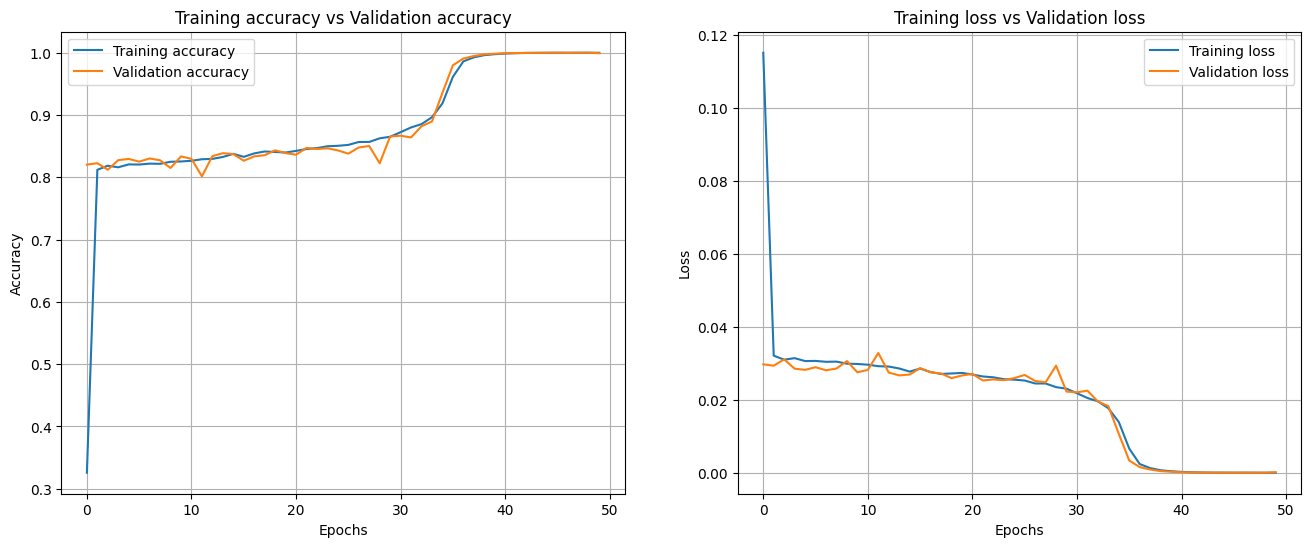

In [276]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history['accuracy'],label='Training accuracy')
plt.plot(history['val_accuracy'],label='Validation accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history['loss'],label='Training loss')
plt.plot(history['val_loss'],label='Validation loss')
plt.title('Training loss vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()

Making predictions and plotting the prediction accuracy vs true levels of the test data

16/16 [==============================] - 0s 4ms/step


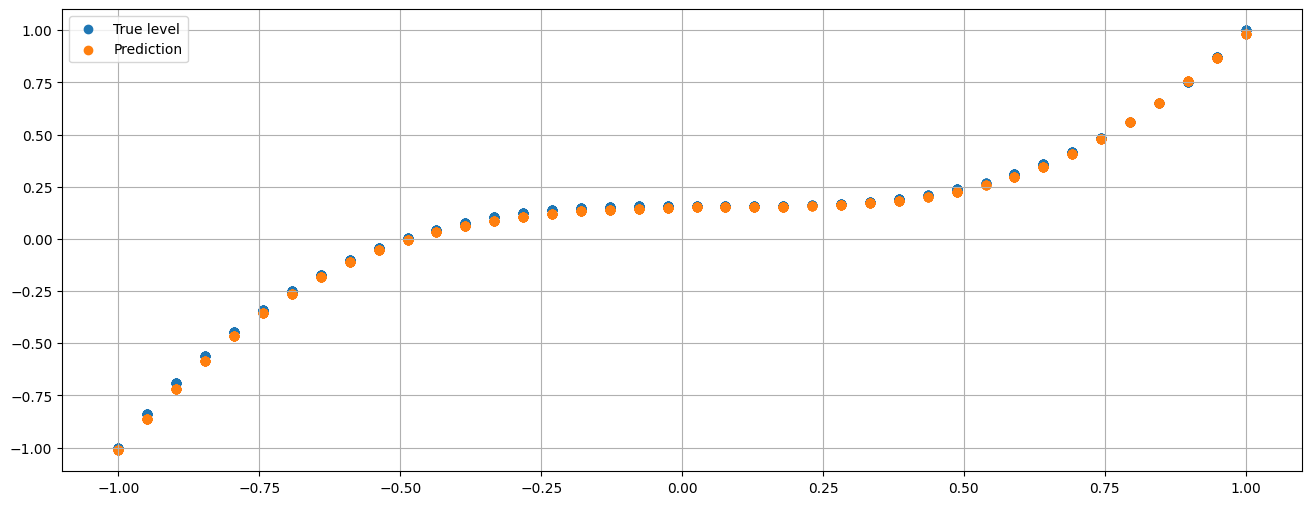

In [277]:
predictions = model.predict(x_test)

plt.figure(figsize=(16, 6))
plt.scatter(x_test, y_test, label='True level')
plt.scatter(x_test, predictions, label='Prediction')
plt.legend()
plt.grid()
plt.show()